In [2]:
import pandas as pd 

df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/bitcoin_price_usd.csv', sep=',')  
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

,Date,Close
1456,2023-12-27,43442.855469
1457,2023-12-28,42627.855469
1458,2023-12-29,42099.402344
1459,2023-12-30,42156.902344
1460,2023-12-31,42265.187500


In [5]:
from nixtla import NixtlaClient

nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key = 'nixtla-tok-c4qdpmIEYyIOMU7QPO5vUXGFUfO8GuuuJFbhghwcOTd7hzqjCDpJZegWsZWmMBMfEX6QfYh60jHCS5e6'
)

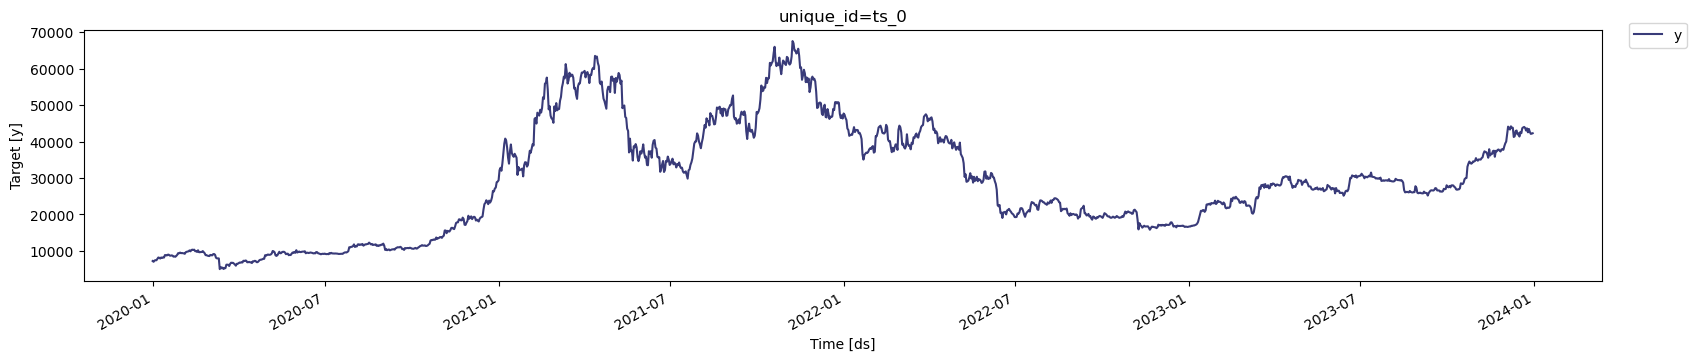

In [6]:
nixtla_client.plot(df)

In [27]:
level = [50,80,90] # confidence levels 

fcst = nixtla_client.forecast(df, h=7, level=level)
fcst.head()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: D
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


,ds,TimeGPT,TimeGPT-lo-90,TimeGPT-lo-80,TimeGPT-lo-50,TimeGPT-hi-50,TimeGPT-hi-80,TimeGPT-hi-90
0,2024-01-01,42269.460938,39567.208203,40429.952734,41380.655273,43158.266602,44108.969141,44971.713672
1,2024-01-02,42469.917969,39697.941992,40578.197266,41466.510742,43473.325195,44361.638672,45241.893945
2,2024-01-03,42864.078125,40538.870117,41586.253125,42284.318359,43443.837891,44141.903125,45189.286133
3,2024-01-04,42881.621094,40603.116211,41216.106250,42058.541016,43704.701172,44547.135938,45160.125977
4,2024-01-05,42773.457031,40213.698828,40665.385156,41489.812500,44057.101562,44881.528906,45333.215234


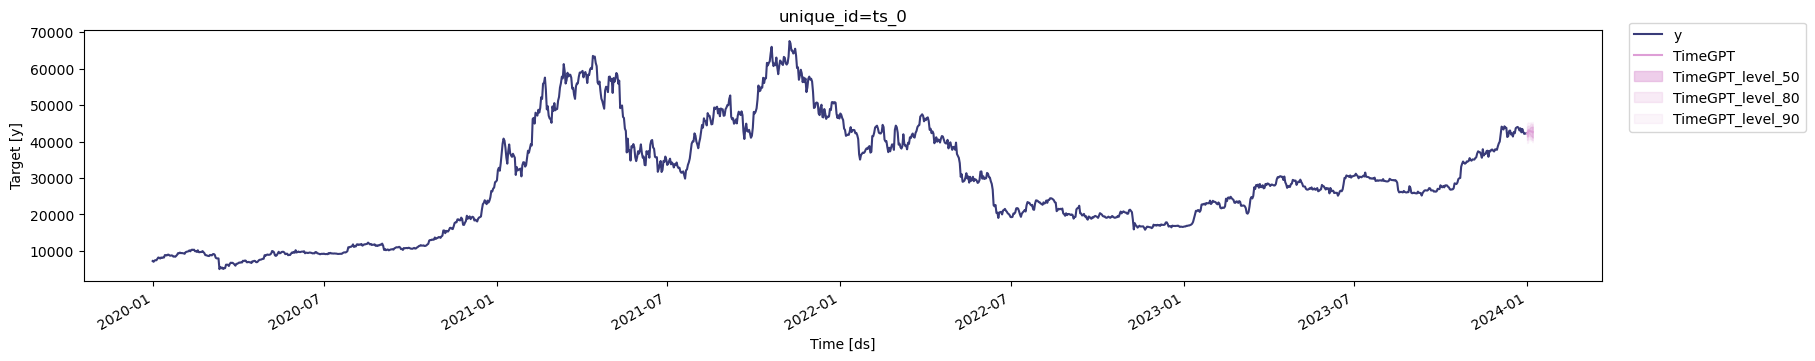

In [28]:
nixtla_client.plot(df, fcst, level=level)

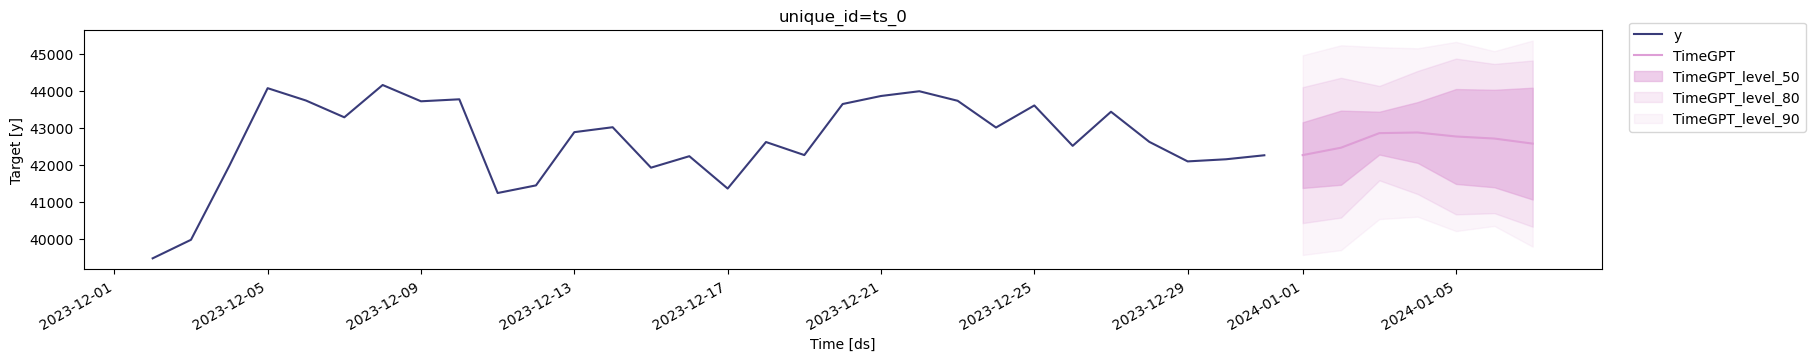

In [29]:
nixtla_client.plot(df, fcst, level=level, max_insample_length=30)

In [21]:
forecast = nixtla_client.forecast(df, h=7, level=level, add_history=True)
forecast.head()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: D
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...
INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...


,ds,TimeGPT,TimeGPT-lo-50,TimeGPT-lo-80,TimeGPT-lo-90,TimeGPT-hi-50,TimeGPT-hi-80,TimeGPT-hi-90
0,2020-02-03,9425.702148,7622.106397,5998.813960,5027.338776,11229.297899,12852.590337,13824.065521
1,2020-02-04,9568.482422,7764.886671,6141.594233,5170.119049,11372.078173,12995.370610,13966.845795
2,2020-02-05,9557.082031,7753.486280,6130.193843,5158.718659,11360.677782,12983.970220,13955.445404
3,2020-02-06,9486.123047,7682.527296,6059.234858,5087.759674,11289.718798,12913.011235,13884.486420
4,2020-02-07,9475.242188,7671.646437,6048.353999,5076.878815,11278.837938,12902.130376,13873.605560


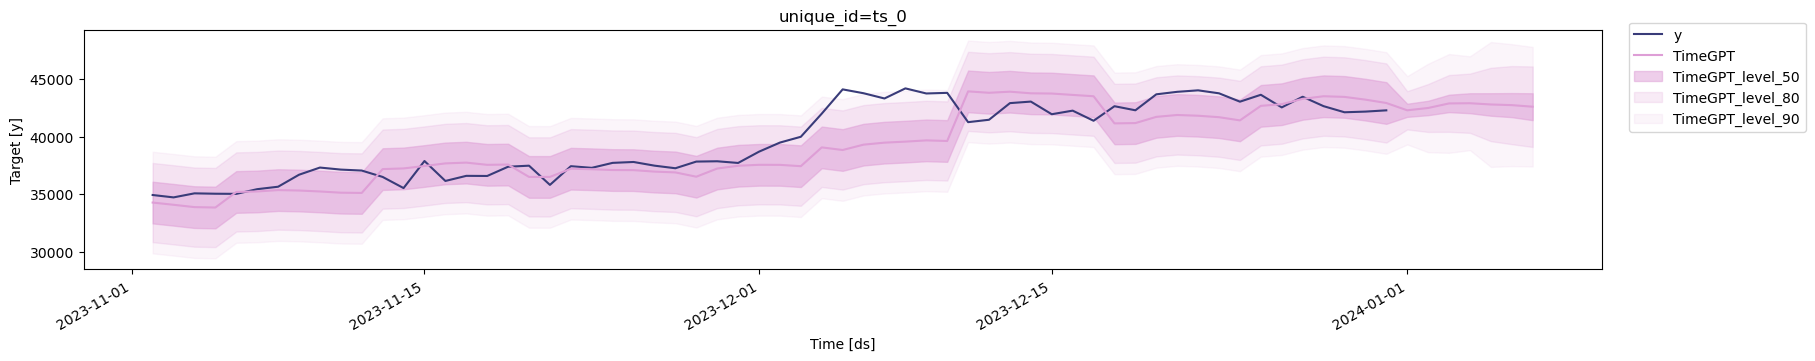

In [34]:
nixtla_client.plot(df, forecast.tail(67), level=level, max_insample_length=60)

In [23]:
anomalies_df = nixtla_client.detect_anomalies(df)

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: D
INFO:nixtla.nixtla_client:Calling Anomaly Detector Endpoint...


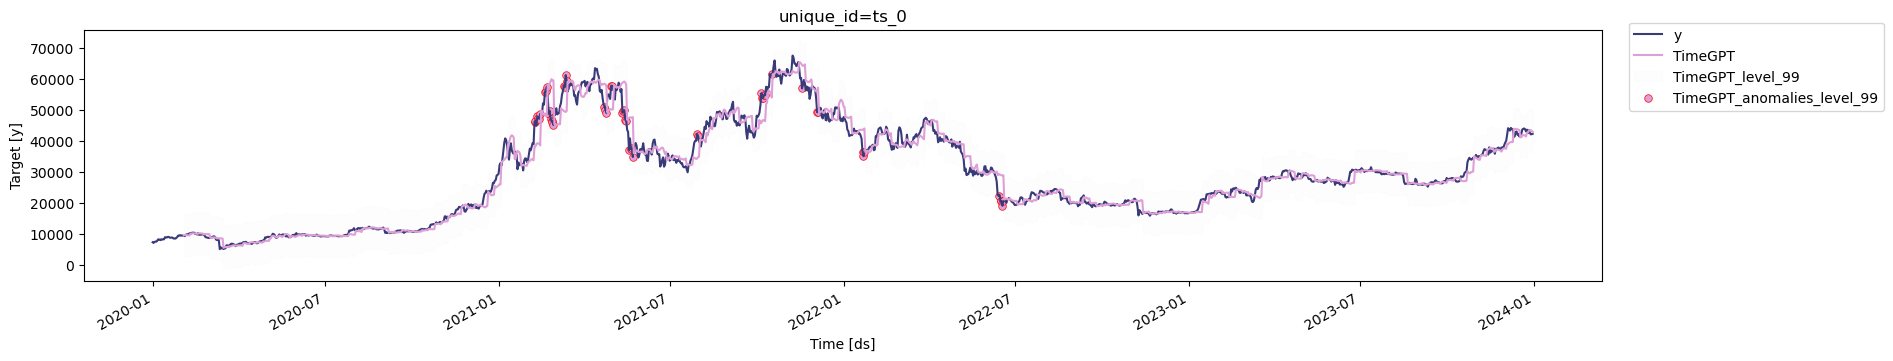

In [24]:
nixtla_client.plot(df, anomalies_df, plot_anomalies=True)